In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

     iteration  mean_response_time  response_time_s execution_type      cost
1            2         1598.079348         1.598079            cpu  0.000061
2            3         1635.304880         1.635305            cpu  0.000062
3            4         1632.954216         1.632954            cpu  0.000062
4            5         2283.345699         2.283346            cpu  0.000087
5            6         1499.684620         1.499685            cpu  0.000057
..         ...                 ...              ...            ...       ...
495        496          140.285635         0.140286            gpu  0.000019
496        497          155.925941         0.155926            gpu  0.000021
497        498          209.904242         0.209904            gpu  0.000028
498        499          135.798025         0.135798            gpu  0.000018
499        500          147.877312         0.147877            gpu  0.000020

[499 rows x 5 columns]


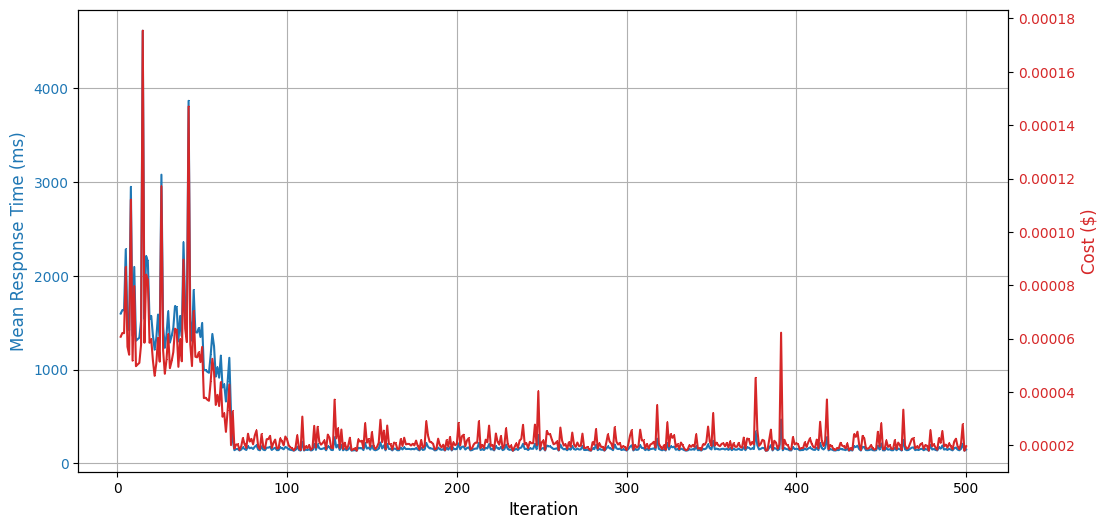

In [21]:
path = "./data/auto"

# Load all CSV files
csv_files = glob.glob(path + "/*.csv")

dfs = [pd.read_csv(file, usecols=["response_time_ms"]) for file in csv_files]

combined = pd.concat(dfs, axis=1)
combined.columns = [f"run_{i + 1}" for i in range(len(dfs))]

combined.head()

row_means = pd.DataFrame({
    "iteration": range(1, len(combined) + 1),
    "mean_response_time": combined.mean(axis=1).values
})

# remove first row (cold start) for better visualization
row_means = row_means.iloc[1:]
row_means["response_time_s"] = row_means["mean_response_time"] / 1000

# determine execution type
row_means["execution_type"] = row_means["response_time_s"].apply(
    lambda x: "cpu" if x > 0.5 else "gpu"
)

# assign rates
cpu_rate = 0.000038  # per second
gpu_rate = 0.000133  # per second

# calculate cost
row_means["cost"] = row_means.apply(
    lambda row: row["response_time_s"] * (cpu_rate if row["execution_type"] == "cpu" else gpu_rate),
    axis=1
)

print(row_means)

# plot with iteration on x axis and mean_response_time on y axis
# First y-axis: response time
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(row_means["iteration"], row_means["mean_response_time"], color="tab:blue", marker=',')
ax1.set_xlabel("Iteration", fontsize=12)
ax1.set_ylabel("Mean Response Time (ms)", fontsize=12, color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.grid(True)

# Second y-axis: cost
ax2 = ax1.twinx()
ax2.plot(row_means["iteration"], row_means["cost"], color="tab:red", marker=',')
ax2.set_ylabel("Cost ($)", fontsize=12, color="tab:red")
ax2.tick_params(axis='y', labelcolor="tab:red")

plt.show()


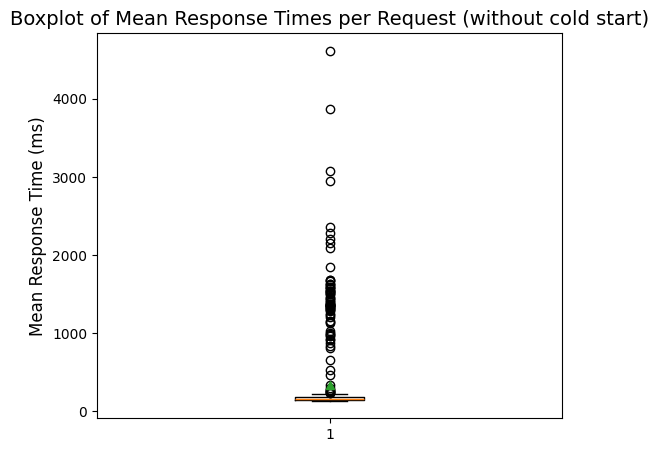

In [27]:
# Compute row means, skipping the first row (cold start)
row_means_without_coldstart = combined.iloc[1:].mean(axis=1)

# Create a boxplot of row means
plt.figure(figsize=(6,5))
plt.boxplot(row_means_without_coldstart, showmeans=True)

# Add title and labels
plt.title("Boxplot of Mean Response Times per Request (without cold start)", fontsize=14)
plt.ylabel("Mean Response Time (ms)", fontsize=12)

plt.show()

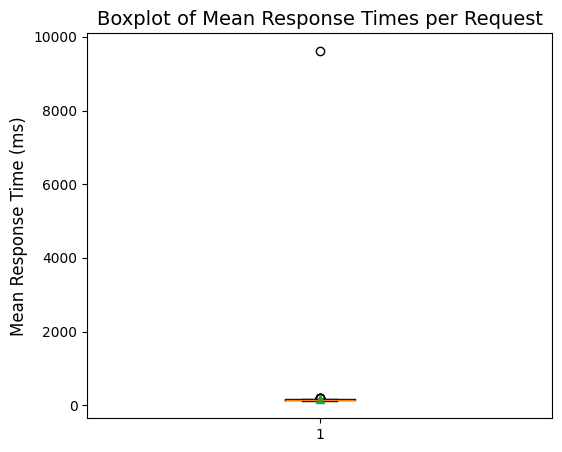

In [10]:
# GPU Boxplot
path_gpu = "./data/gpu"

# Load all CSV files
gpu_csv_files = glob.glob(path_gpu + "/*.csv")

gpu_dfs = [pd.read_csv(file, usecols=["response_time_ms"]) for file in gpu_csv_files]

gpu_combined = pd.concat(gpu_dfs, axis=1)
gpu_combined.columns = [f"run_{i + 1}" for i in range(len(gpu_dfs))]

# Display the combined DataFrame
gpu_combined.head()

# Create the boxplot
gpu_row_means = gpu_combined.mean(axis=1)

# Create a boxplot of row means
plt.figure(figsize=(6,5))
plt.boxplot(gpu_row_means, showmeans=True)

# Add title and labels
plt.title("Boxplot of Mean Response Times per Request", fontsize=14)
plt.ylabel("Mean Response Time (ms)", fontsize=12)

plt.show()


In [16]:
# Compute row means, skipping cold start
gpu_row_means_without_coldstart = gpu_combined.iloc[1:].mean(axis=1)

# Create a boxplot of row means
plt.figure(figsize=(6,5))
plt.boxplot(gpu_row_means_without_coldstart, showmeans=True)

# Add title and labels
plt.title("Boxplot of Mean Response Times per Request (without cold start)", fontsize=14)
plt.ylabel("Mean Response Time (ms)", fontsize=12)

plt.show()

NameError: name 'gpu_combined' is not defined

In [17]:
# Combine both CPU and GPU data for comparison

data = [row_means_without_coldstart, gpu_row_means_without_coldstart]

# Create the boxplot
plt.figure(figsize=(8,6))
plt.boxplot(data, tick_labels=["Execution Mode Auto", "Execution Mode GPU"], showmeans=True)

# Add title and labels
plt.title("Comparison of Mean Response Times per Request", fontsize=14)
plt.ylabel("Mean Response Time (ms)", fontsize=12)

plt.show()

NameError: name 'row_means_without_coldstart' is not defined

In [18]:
# Calculate and print summary statistics

# mean of first values
auto_coldstart = combined.iloc[0].mean()
gpu_coldstart = gpu_combined.iloc[0].mean()

print(f"Auto Cold Start Mean: {auto_coldstart:.2f} ms")
print(f"GPU Cold Start Mean: {gpu_coldstart:.2f} ms")

NameError: name 'gpu_combined' is not defined